## <font  color='black'><center>Data Mining Project</center></font>
# <font  color='red'><center>Fraude Detection</center></font>


#  Data Understanding

### <font  color='red'>Reading Data</font>


In [64]:
import numpy as np
import pandas as pd


data = pd.read_csv('C:/Users/Khaoula/Downloads/xAPI-Edu-Data.csv') #columns = ['Gender','Nationality', 'PlaceofBirth','StageID','GradeID','SectionID'
                                              #,'Topic','Semester','Relation','RaisedHands','VisitedResources'
                                              #,'AnnoucementsView','Discussion','ParentAnsweringSurvey',
                                              #'ParentSchoolSatisfaction','StudentAbsenceDays','Class/FinalGrade'])

print (data.shape)

    
data.head(15)

(480, 17)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


### <font  color='red'>Describe data</font>


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [66]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


### Summary of Statistics [separated by class]: 'High, Middle, Low'

In [67]:
data.groupby('Class').aggregate(['min', np.median, np.mean, max])

raisedhands                        VisITedResources                    \
              min median       mean  max              min median       mean   
Class                                                                         
H              10     75  70.288732  100                4     84  78.746479   
L               0     10  16.889764   80                0     11  18.322835   
M               0     50  48.938389  100                2     72  60.635071   

          AnnouncementsView                       Discussion         \
      max               min median       mean max        min median   
Class                                                                 
H      99                 2     52  53.380282  98          2     54   
L      90                 0     11  15.574803  66          1     21   
M      99                 0     38  40.962085  93          3     40   

                      
            mean max  
Class                 
H      53.661972  99  
L      30.834646  98  
M      43.791469  98

### <font  color='red'>Explore data</font>


### Data Visualization & Exploratory Analysis

M    211
H    142
L    127
Name: Class, dtype: int64

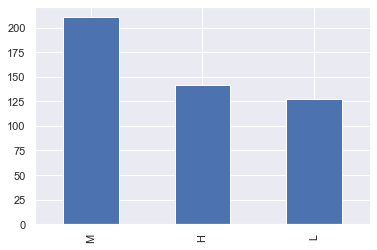

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

data.Class.value_counts().plot(kind='bar')

data.Class.value_counts()

### Categorical Feature Analysis - Parent Satisfation & Relation [Separated by Class: H, M, L]

Text(0.5, 1.0, 'Mother Responsible for Student')

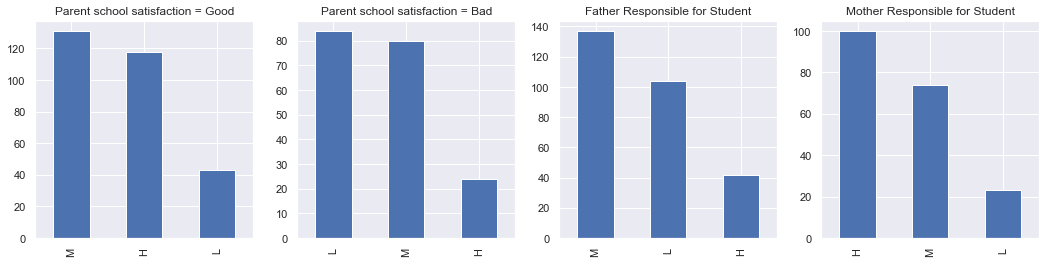

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,4))

plt.subplot(141)
good_sat= data.Class[data.ParentschoolSatisfaction== 'Good'].value_counts()
good_sat.plot(kind='bar')
plt.title('Parent school satisfaction = Good')

plt.subplot(142)
bad_sat = data.Class[data.ParentschoolSatisfaction== 'Bad'].value_counts()
bad_sat.plot(kind='bar')
plt.title('Parent school satisfaction = Bad')

plt.subplot(143)
survey_no = data.Class[data.Relation == 'Father'].value_counts()
survey_no.plot(kind='bar')
plt.title('Father Responsible for Student')

plt.subplot(144)
survey_yes = data.Class[data.Relation == 'Mum'].value_counts()
survey_yes.plot(kind='bar')
plt.title('Mother Responsible for Student')

In [7]:
grades_count = data.groupby(['ParentschoolSatisfaction','Class'])['Class'].aggregate('count').unstack()

grades_count

Class,H,L,M
ParentschoolSatisfaction,,,
Bad,24,84,80
Good,118,43,131


In [8]:
#shows that adding relation only adds noise, not a significant difference between father & mum 

data.pivot_table('raisedhands', index = ['ParentschoolSatisfaction','Relation'], 
                 columns = 'Class', aggfunc = 'mean')

Class                                      H          L          M
ParentschoolSatisfaction Relation                                 
Bad                      Father    73.375000  16.282051  42.793103
                         Mum       75.687500  16.000000  45.818182
Good                     Father    65.764706  17.076923  45.240506
                         Mum       70.797619  19.705882  62.730769

Text(0, 0.5, 'Average number of times student raised hand')

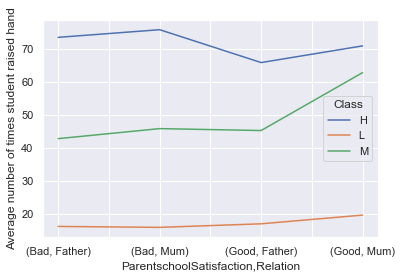

In [9]:
parents_hands = data.pivot_table('raisedhands', index = ['ParentschoolSatisfaction','Relation'], 
                 columns = 'Class', aggfunc = 'mean')

parents_hands.plot()
plt.ylabel('Average number of times student raised hand')

### Categorical Feature Analysis Cont

<AxesSubplot:xlabel='StudentAbsenceDays'>

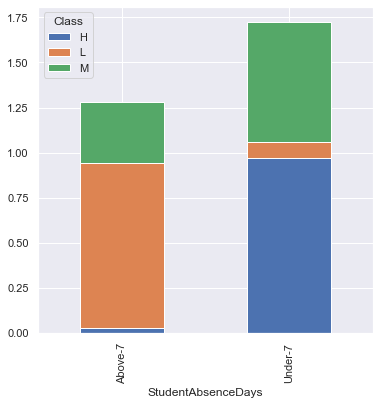

In [10]:
import matplotlib.pyplot as plt

attendance = pd.crosstab(index=data['StudentAbsenceDays'], columns=[data['Class']], normalize='columns')


attendance.plot(kind='bar', figsize=(6,6), stacked=True)

### Moving on to numerical feature analysis:

Text(0.5, 1.0, 'Viewed Announcements')

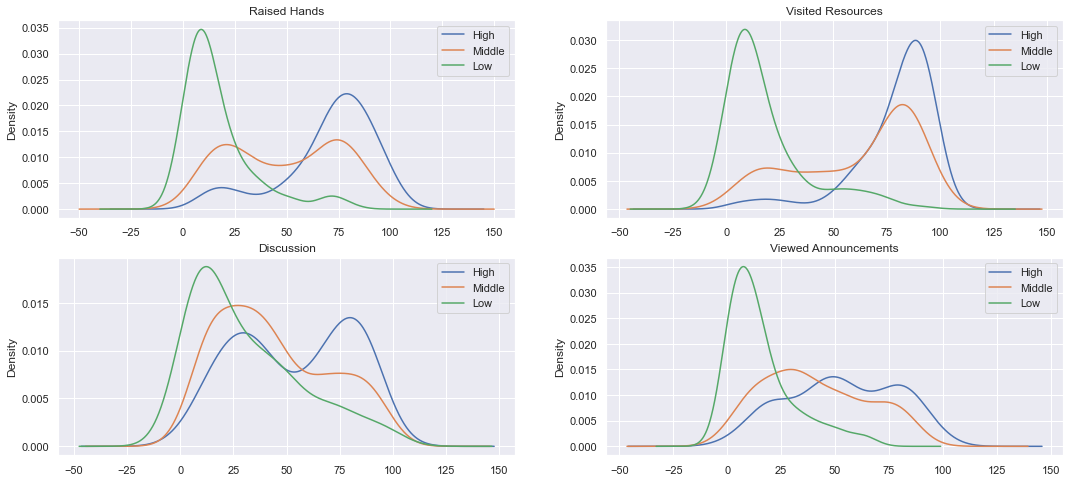

In [11]:
fig = plt.figure(figsize=(18,8))

plt.subplot(221)
data.raisedhands[data.Class == 'H'].plot(kind='kde') 
data.raisedhands[data.Class == 'M'].plot(kind='kde') 
data.raisedhands[data.Class == 'L'].plot(kind='kde') 
plt.legend(('High', 'Middle','Low'),loc='best') 
plt.title('Raised Hands')


plt.subplot(222)
data.VisITedResources[data.Class == 'H'].plot(kind='kde') 
data.VisITedResources[data.Class == 'M'].plot(kind='kde') 
data.VisITedResources[data.Class == 'L'].plot(kind='kde') 
plt.legend(('High', 'Middle','Low'),loc='best') 
plt.title('Visited Resources')


plt.subplot(223)
data.Discussion[data.Class == 'H'].plot(kind='kde') 
data.Discussion[data.Class == 'M'].plot(kind='kde') 
data.Discussion[data.Class == 'L'].plot(kind='kde') 
plt.legend(('High', 'Middle','Low'),loc='best')
plt.title('Discussion')

plt.subplot(224)
data.AnnouncementsView[data.Class == 'H'].plot(kind='kde') 
data.AnnouncementsView[data.Class == 'M'].plot(kind='kde') 
data.AnnouncementsView[data.Class == 'L'].plot(kind='kde') 
plt.legend(('High', 'Middle','Low'),loc='best')
plt.title('Viewed Announcements')

###  Numerical Feature Analysis: Relationship & Correlation

In [12]:
raised_hands = data['raisedhands']
discussion = data['Discussion']
v_resources = data['VisITedResources']
v_announcements = data['AnnouncementsView']

def correlation(x,y):
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    
    return (std_x * std_y).mean()

print ('Raised hands & Discussion: ', correlation(raised_hands, discussion))

print ('Visted Resources & Discussion: ', correlation(v_resources, discussion))

print ('Raised hands & Visited Resources: ', correlation(raised_hands, v_resources))

Raised hands & Discussion:  0.3393859910133952
Visted Resources & Discussion:  0.24329176916115017
Raised hands & Visited Resources:  0.6915717054692965


### A more detailed view of correlation: Heatmap visualization

<AxesSubplot:>

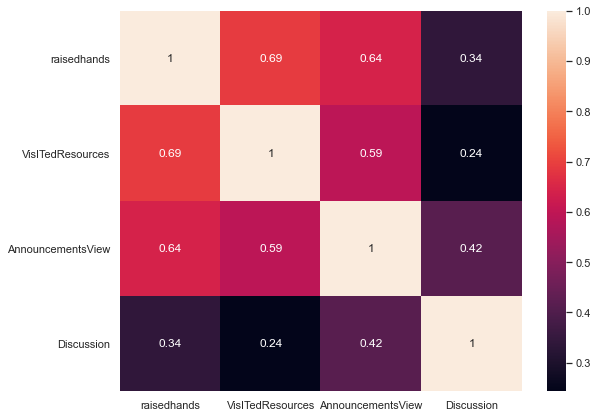

In [13]:
fig,ax= plt.subplots(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)

0    50
1    50
2    10
3    10
4    50
Name: Class, dtype: int64


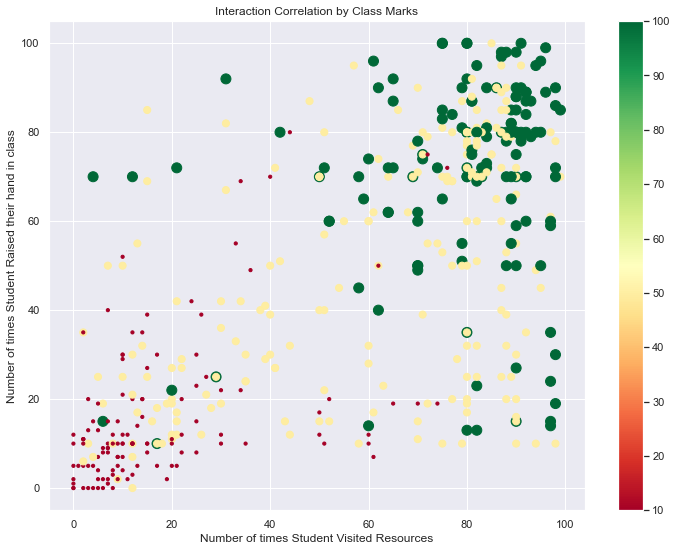

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def new_grade(grade):
    if grade == 'H':
        return 100
    elif grade == 'M':
        return 50
    elif grade == 'L':
        return 10
    
def new_grades(grades): 
    return grades.apply(new_grade)

print (new_grades(data['Class']).head())

converted_grades = new_grades(data['Class'])



fig = plt.figure(figsize=(12, 9))
plt.scatter(data['VisITedResources'], data['raisedhands'],c= converted_grades, s = converted_grades, cmap = 'RdYlGn')
plt.ylabel("Number of times Student Raised their hand in class")
plt.xlabel("Number of times Student Visited Resources")
plt.title ('Interaction Correlation by Class Marks')
plt.colorbar()

#  Data Preparation

### <font  color='red'>Removal of outliers</font>


In [68]:
#Création des critères d'une valeur aberrante basée sur plusieurs conditions. 
#Ne traitez que les classes 'H' et 'L' pour être sûr. 

#élève de classe H ne peut pas avoir un nombre raisehands inférieur à 17 (moyenne raisehands class L)
outliers_1 = data[(data['Class'] == 'H') & (data['raisedhands'] <= 17)]

#élève de classe H ne peut pas avoir un nombre VisITedResources inférieur à 18 
#18 c'est la moyenne de VisITedResources pour la class L
outliers_2 = data[(data['Class'] == 'H') & (data['VisITedResources'] <= 18)]

#élève de classe L ne peut pas avoir un nombre raisehands supérieur à 70 (moyenne raisehands class H)
outliers_3 = data[(data['Class'] == 'L') & (data['raisedhands'] >= 70)]

#élève de classe L ne peut pas avoir un nombre VisITedResources supérieur à 78 
#78 c'est la moyenne de VisITedResources pour la class H
outliers_4 = data[(data['Class'] == 'L') & (data['VisITedResources'] >= 78)]

#élève de classe H ne peut pas avoir un nombre StudentAbsenceDays supérieur à 7 
#élève de classe L ne peut pas avoir un nombre StudentAbsenceDays inférieur à 7 
outliers_5 = data[(data['Class'] == 'H') & (data['StudentAbsenceDays'] == 'Above-7')]
outliers_6 = data[(data['Class'] == 'L') & (data['StudentAbsenceDays'] == 'Under-7')]

In [16]:
outliers_1

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
48,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,13,80,40,88,Yes,Good,Under-7,H
96,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,14,60,11,75,Yes,Good,Under-7,H
200,M,KW,KuwaIT,MiddleSchool,G-08,B,Arabic,S,Mum,15,90,52,83,Yes,Bad,Under-7,H
250,M,KW,KuwaIT,lowerlevel,G-04,A,Math,S,Father,15,6,32,40,Yes,Good,Under-7,H
255,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,10,17,12,40,Yes,Good,Under-7,H
344,F,Jordan,Jordan,lowerlevel,G-02,B,French,F,Mum,14,97,15,14,No,Good,Under-7,H
345,F,Jordan,Jordan,lowerlevel,G-02,B,French,F,Mum,13,82,20,30,No,Good,Under-7,H
450,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,15,97,22,10,Yes,Good,Under-7,H


In [17]:
outliers_2

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
47,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,70,4,39,90,Yes,Good,Under-7,H
86,M,SaudiArabia,SaudiArabia,lowerlevel,G-02,B,IT,F,Father,70,12,40,50,Yes,Good,Under-7,H
250,M,KW,KuwaIT,lowerlevel,G-04,A,Math,S,Father,15,6,32,40,Yes,Good,Under-7,H
255,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,10,17,12,40,Yes,Good,Under-7,H


In [18]:
outliers_3

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
94,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,80,44,35,10,No,Good,Above-7,L
129,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70,90,2,2,Yes,Good,Under-7,L
248,F,KW,KuwaIT,MiddleSchool,G-06,A,Quran,S,Father,70,40,2,16,No,Bad,Above-7,L
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


In [19]:
outliers_4

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
129,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70,90,2,2,Yes,Good,Under-7,L


In [20]:
outliers_5

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
14,F,KW,KuwaIT,MiddleSchool,G-08,A,Math,F,Mum,62,70,44,60,No,Bad,Above-7,H
84,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,50,70,50,10,Yes,Good,Above-7,H
205,F,SaudiArabia,SaudiArabia,MiddleSchool,G-08,B,Arabic,S,Mum,72,51,42,24,Yes,Bad,Above-7,H
228,M,KW,KuwaIT,HighSchool,G-11,B,Math,S,Mum,73,84,77,81,Yes,Good,Above-7,H


In [21]:
outliers_6

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
72,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,11,2,2,8,No,Bad,Under-7,L
74,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,12,0,6,13,No,Bad,Under-7,L
80,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,8,15,10,40,Yes,Bad,Under-7,L
87,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,19,70,3,50,No,Bad,Under-7,L
88,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,3,12,4,33,No,Bad,Under-7,L
124,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,0,6,4,15,Yes,Bad,Under-7,L
128,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,12,10,20,16,No,Bad,Under-7,L
129,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70,90,2,2,Yes,Good,Under-7,L
190,M,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,S,Father,23,25,32,53,No,Bad,Under-7,L
226,M,KW,KuwaIT,MiddleSchool,G-08,B,Spanish,S,Father,2,11,62,30,No,Bad,Under-7,L


In [69]:
#dropping the rows which contained the outliers as indicated by the above criteria

new_data = data.drop([14,47,48,72,74,80,84,86,87,88,94,96,124,128,129,190,200,205,226,227,
                      228,248,250,255,344,345,444,445,450])

#Using shape to check the number of outliers dropped, usually no more than 10%.
#However, since the dataset is small, better to leave more data to work with. 
#451 left out of the orginal 480 observations: We only dropped ~ 6% of data. 

print(new_data.shape)

(451, 17)


### <font  color='red'>Encoding categorical data</font>


In [70]:
#Preprocessing data to encode categorical values for the y-target column

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

target_value = le.fit_transform(new_data.Class)

print (target_value)

[2 2 1 1 2 2 1 2 2 2 0 2 1 1 2 2 2 2 0 2 2 2 1 1 1 2 1 2 2 0 1 1 1 1 1 1 2
 1 2 1 2 1 2 2 1 1 2 1 1 2 0 1 1 1 1 2 2 1 2 0 2 1 1 2 0 0 2 1 2 2 2 2 2 1
 0 1 1 2 1 1 1 0 0 0 0 2 2 2 2 0 1 1 2 1 2 0 2 2 0 2 1 1 1 1 2 0 2 2 2 1 2
 2 1 2 1 1 2 1 1 0 0 0 2 0 2 1 1 2 0 1 2 0 2 2 0 0 2 0 1 2 0 2 2 1 2 0 2 0
 2 2 0 2 0 0 2 0 2 1 1 2 1 0 2 0 2 0 1 0 2 1 0 2 2 0 2 1 2 2 2 2 0 0 1 2 0
 2 2 1 2 2 2 2 0 2 0 1 1 1 2 2 0 2 2 2 2 0 0 2 1 2 1 2 2 2 1 1 2 2 0 0 2 1
 2 0 2 0 2 2 1 2 1 0 0 2 2 1 1 2 2 2 2 0 2 2 2 2 0 2 2 0 0 0 0 0 2 2 0 0 0
 0 2 2 0 0 2 2 1 1 0 0 2 2 0 0 2 2 1 1 2 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 0 0
 2 2 1 1 2 2 1 1 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 0 0 1 1 1 1 2 2 0 0 2 2 0
 0 2 2 0 0 0 0 2 2 0 0 2 2 1 1 1 1 2 2 1 1 1 1 0 0 0 0 2 2 1 1 2 2 0 0 0 0
 2 2 0 0 2 2 0 0 0 0 1 1 2 2 0 0 2 2 1 1 0 0 0 0 0 0 2 2 0 0 2 2 1 1 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 1 1 2 2 2
 2 1 1 2 2 1 1]


In [71]:
data_dummies = pd.get_dummies(new_data, columns = ['ParentschoolSatisfaction', 'StudentAbsenceDays','Relation'])

print(data_dummies.shape)

data_dummies.head()

(451, 20)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,Class,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Relation_Father,Relation_Mum
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,15,16,2,20,Yes,M,0,1,0,1,1,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,20,20,3,25,Yes,M,0,1,0,1,1,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,10,7,0,30,No,L,1,0,1,0,1,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,30,25,5,35,No,L,1,0,1,0,1,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,40,50,12,50,No,M,1,0,1,0,1,0


# Modeling

### <font  color='red'>Logistic Regression</font>


In [79]:
feature_cols = feature_cols = ['raisedhands', 'VisITedResources',  'ParentschoolSatisfaction_Bad',  'Relation_Father', 
                               'Relation_Mum','ParentschoolSatisfaction_Good', 'StudentAbsenceDays_Above-7',
                                'StudentAbsenceDays_Under-7']

X = data_dummies[feature_cols]
y = target_value


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe_lr = Pipeline([('rs', StandardScaler()), ('pca', PCA(n_components = 4)), 
                    ('logreg', LogisticRegression(C=1e9))])

pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)

print ('--------- logistic Regression ------------')

from sklearn.metrics import accuracy_score,precision_score,recall_score
print ('Prediction Accuracy:', accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(' ', classification_report(y_test, y_pred))


--------- logistic Regression ------------
Prediction Accuracy: 0.75
                precision    recall  f1-score   support

           0       0.69      0.86      0.77        21
           1       0.74      0.93      0.82        15
           2       0.83      0.59      0.69        32

    accuracy                           0.75        68
   macro avg       0.75      0.79      0.76        68
weighted avg       0.77      0.75      0.74        68



### <font  color='red'>Random Forest</font>


In [83]:
# RANDOM FOREST CLASSIFIER model -- ensemble method No.1

feature_cols = ['raisedhands', 'VisITedResources', 'ParentschoolSatisfaction_Bad',  
                'ParentschoolSatisfaction_Good', 'StudentAbsenceDays_Above-7', 'Relation_Father', 
                               'Relation_Mum',
                'StudentAbsenceDays_Under-7']

X = data_dummies[feature_cols]
y = target_value


# train/test split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit_transform(X_train, y_train)
scl.transform(X_test)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, n_estimators=200, oob_score = True, n_jobs = -1, 
                                                   random_state=50)
rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)

print ('--------- Random Forest ------------')

from sklearn.metrics import accuracy_score,precision_score,recall_score
print ('Prediction Accuracy:', accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(' ', classification_report(y_test, y_pred))



--------- Random Forest ------------
Prediction Accuracy: 0.8382352941176471
                precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.91      0.95      0.93        21
           2       0.78      0.81      0.79        26

    accuracy                           0.84        68
   macro avg       0.84      0.84      0.84        68
weighted avg       0.84      0.84      0.84        68



<AxesSubplot:title={'center':'Feature importance'}>

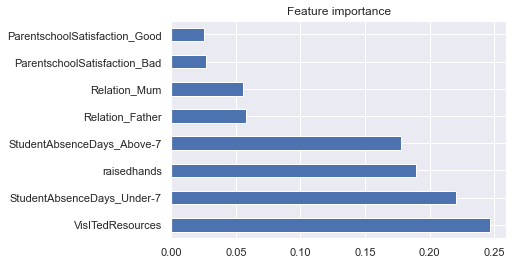

In [30]:
# Taking a look at feature importance via Random Forest

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feat_imp = pd.Series(rfc.feature_importances_, index=X.columns)
feat_imp.sort_values(inplace=True, ascending=False)
feat_imp.head(20).plot(kind='barh', title='Feature importance')

### <font  color='red'>SVM Classifier</font>


In [102]:
# SVM CLASSIFIER model -- ensemble method No.1

feature_cols = ['raisedhands', 'VisITedResources', 'ParentschoolSatisfaction_Bad',  
                'ParentschoolSatisfaction_Good', 'StudentAbsenceDays_Above-7', 'Relation_Father', 
                               'Relation_Mum',
                'StudentAbsenceDays_Under-7']

X = data_dummies[feature_cols]
y = target_value


# train/test split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit_transform(X_train, y_train)
scl.transform(X_test)


from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C = 1, random_state = 50)
svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

print ('--------- SVM Classifier ------------')

from sklearn.metrics import accuracy_score,precision_score,recall_score
print ('Prediction Accuracy:', accuracy_score(y_test, y_pred))


from sklearn.metrics import classification_report
print(' ', classification_report(y_test, y_pred))



--------- SVM Classifier ------------
Prediction Accuracy: 0.8676470588235294
                precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.90      0.95      0.93        20
           2       0.83      0.86      0.84        28

    accuracy                           0.87        68
   macro avg       0.87      0.87      0.87        68
weighted avg       0.87      0.87      0.87        68

